# **CHAPTER 3**

## 1. 37~39 난수생성: 

- 크기지정했을때 난수생성하기

In [1]:
import tensorflow as tf

rand = tf.random.uniform([1],0,1)
print(rand)

# tf.random.uniform( [결과값의 크기 *튜플아님!], (최솟값), (최댓값) ): 
# 균일분포(uniform distribution, 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포)의 난수 

# tf.random.normal( [결과값의 크기], (평균), (표준편차))

tf.Tensor([0.68867755], shape=(1,), dtype=float32)


## 2. 42 뉴런, 활성화함수: 
- 뉴런그림: 출력, 활성화함수 
    - 활성화함수 정의
    - 그림에서 활성화함수 위치 확인

- sigmoid, relu: 해당하는 그래프 찾기 

- sigmoid 파이썬으로 구현한 식 확인

- 뉴런의 구조: 입력, 가중치, 활성화함수, 출력

- 가장 간단한 형태의 뉴런은 입력에 가중치를 곱한 뒤 활성화 함수를 취하면 출력을 얻을 수 있음. 


- 가중치: 뉴런에서 학습할 때 변하는 것. 처음에는 초기화를 통해 랜덤한 값을 넣고 학습과정에서 점차 일정한 값으로 수렴.

- 활성화함수: 뉴런의 출력값을 정하는 함수. 
    
    - 활성화함수 종류: sigmoid, ReLU
    
    - sigmoid: 출력값을 0~1로 제한.
    
    - ReLU: Recified Linear Unit. 정류된 선형함수. 은닉층을 다수 사용하는 딥러닝에서 주로 쓰임(양수를 그대로 반환하기 떄문에 왜곡 ↓). 
    
    - (딥러닝에서의 선형함수: 입력 == 출력, y = x --> "정류된" : 음수값을 0 으로 만듦) 
    
    

In [2]:
# sigmoid
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [4]:
# 참고: 뉴런의 입력과 출력 정의하기 -입력이 1일때 기대출력이 0이 되는 뉴런 만들기
x = 1
y = 0

w = tf.random.normal([1], 0, 1)

output = sigmoid(x * w)

print(output)

0.17973809656555192


## 3. 46~47 편향: 그림, 의미(T/F)

입력이 기대출력에 가까우려면 가중치 조정이 필요한데, 
가중치를 조정하는 식을 만들었지만 특정한 경우 가중치가 더 이상 변하지 않는 것을 대비하기 위해 
(예: 곱하기 연산이 있는 가중치조정식에 0이 곱해질 때)
"편향(bias)"을 뉴런에 넣어준다. 

- 편향: 한쪽으로 치우친 고정된 값(보편적으로 1)을 입력으로 받게 하기.

- 일종의 입력에 적용하는 '가중치'이기 때문에 tf.random.normal([1], 0, 1) 등의 방법으로 정의. 

In [8]:
# 참고: 입력이 0일때 기대출력이 1이 되는 뉴런의 학습에 편향 더해주기
x = 0
y = 1

w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x*w + 1*b)
    error = y - output
    w = w + x*0.1*error    # 가중치 및 편향 업데이트: 학습률: 0.1
    b = b + 1*0.1*error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.11602063708454702 0.883979362915453
199 0.05598689203723883 0.9440131079627612
299 0.03645218288517904 0.963547817114821
399 0.026928248865009885 0.9730717511349901
499 0.021318275071528503 0.9786817249284715
599 0.01762924557512746 0.9823707544248725
699 0.015021964001233457 0.9849780359987665
799 0.013082858870020697 0.9869171411299793
899 0.01158495528442427 0.9884150447155757
999 0.010393452848388551 0.9896065471516114


In [9]:
# 결과분석: 
# error: 0에 가까워짐. 
# output: 1에 가까워짐

# 4. 61 XOR연산: 

- 모델생성시 활성화함수 
   ---> "sigmoid"

- input_shape등을 가려놓고 식별자값만으로 맞는 shape찾기   
   ---> 2개의 입력을 받는 1차원 배열이므로 1차원의 원소개수가 2인 (2, )을 input_shape로 한다. 
   
- mse
  ---> 평균제곱오차 (Mean Squared Error). 오차(기대출력 output과 실제출력 y의 차)를 제곱한 값을 평균

- model.summary()에서 Param의 개수 계산: 
   ---> 각 레이어가 기본적으로 편향을 포함하고 있기 때문에 
        Dense1레이어의 경우) 입력값 3개 (입력값2개 + 편향입력값) * 뉴런 2개 --> 총 파라미터 6개
        Dense2레이어의 경우) 입력값 3개 (Dense1레이어의 뉴런 2개 + 편향입력값) * 뉴런 1개 --> 총 파라미터 3개

In [13]:
# tf.keras를 이용한 XOR 녜트워크 계산하기
import numpy as np

x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = (2,)),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


# **CHAPTER 4**

## 5. 73~77 선형회귀: 

- 정의, 설명(T/F) + 공유파일 

    - 선형회귀(Linear Regression): 데이터의 경향성을 하나의 직선으로 예측하는 것. 
    - cf. 회귀: "연속된 실숫값(ex. 가격, 확률)"을 정확히 예측하는 것.

## 6. 78 회귀선 그리기: 

- 최소제곱법(Least Square Method): 
    - 잔차(residual. '데이터의 경향성을 가장 잘 설명하는 하나의 직선'과 '각 데이터'의 차이.)의 제곱을 최소화하는 알고리즘.
    - 직선의 기울기와 y절편을 구할 수 있다. 

기울기 a: -0.355834147915461 y절편 b: 15.669317743971302


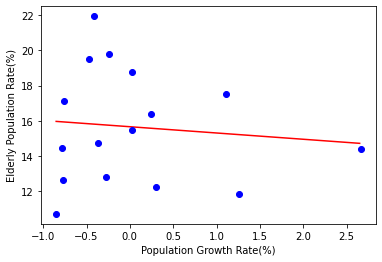

In [15]:
import matplotlib.pyplot as plt

# 최소제곱법으로 회귀선 구하기
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X와 Y의 평균 구하기:
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 기울기와 절편 구하기:
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
# 두 개 이상의 리스트를 하나로 묶기: list(zip(list_1, list_2)) 
#   --각 리스트 요소의 수 같아야 함. 같은 인덱스끼리 하나의 튜플로 묶어서 리스트로 반환
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a*x_bar
print("기울기 a:", a, "y절편 b:", b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터 구하기
# X변화량에 따른 Y예측값!
line_x = np.arange(min(X), max(X), 0.01)
# 파이썬range: 정수로만 구성
# 넘파이arange: numpy.arange(start, stop, step, dtype=None)
# 반열린구간 [start, stop)에서 step의 크기만큼 일정하게 떨어져 있는 숫자들을 array형태로 반환
# cf. 구간기호: [] - 포함, () - 미포함
# 매개변수: stop -반드시 필요 / start, step -전달되지 않았다면 기본값으로 설정(start: 0, step: 1)
# 매개변수로 사용되는 값 ≠ 인덱스번호 --> 실제값을 의미한다! 
line_y = a*line_x + b

# 회귀선 그리기
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

## 7. 81 잔차: T/F

- 잔차: 
    - residual. 데이터의 경향성을 가장 잘 나타내는 직선과 각 데이터의 차이 

- 최적화함수:
    - optimizer. 잔차를 최소화해주는 도구.
    - ADAM optimizer
    - SGD optimizer: 
        - SGD(경사하강법, Stochastic Gradient Descent) 
        - 가중치(w)에 (입력 * 학습률 * 에러)를 더해주는 것 
        - 손실곡선의 기울기. 손실곡선을 미분한 다음 그 값을 이용해서 가중치가 손실이 가장 낮아지는 지점에 도달하도록 반복 계산
        - 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트하겠다! 
        - 'stochastic': 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 조금씩 나눠 계산하겠다!

- 그림


## 8. 83 다항회귀 텐서플로이용

- 예제코드 속 굵은글씨 처리된 y_pred (단답식 可 or 선택)

99 a: 3.8923352 b: -5.6542377 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=6.7722282>> loss: 64.85866
199 a: 2.6166933 b: -4.388018 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.607344>> loss: 29.271107
299 a: 1.1316867 b: -2.126897 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=13.189179>> loss: 15.032329
399 a: 0.2204851 b: -0.72821707 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=14.750825>> loss: 10.65254
499 a: -0.24726267 b: -0.010584844 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=15.553808>> loss: 9.651671
599 a: -0.45277092 b: 0.30468607 c: <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=15.906707>> loss: 9.480407
699 a: -0.53034467 b: 0.4236

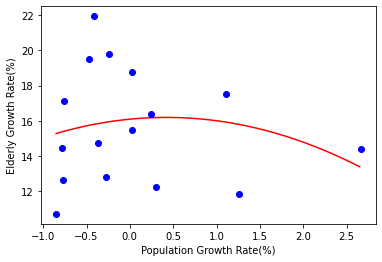

In [17]:
#4.5 텐서플로를 이용해 2차함수 회귀선 구하기 
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a, b, c를 랜덤값으로 초기화하기 
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#잔차제곱의 평균을 반환하는 함수 만들기
def compute_loss():
    y_pred = a * X*X + b * X + c   # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss 

#최적화하기
optimizer = tf.optimizers.Adam(lr = 0.07)

for i in range (1000): 
    optimizer.minimize(compute_loss, var_list=[a, b, c])   # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy, 'loss:', compute_loss().numpy())  # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!

#회귀선의 x, y구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c  # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!

#그래프 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

## 9. 88 sigmoid vs tanh:

- 식

- 그래프

- 설명(T/F)
    - sigmoid: 0~1
    - tanh: -1~1, 단위쌍곡선 공식.

## 10. 87+89+90 회귀선 그리기

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 17ms/sample - loss: 255.9689
Epoch 2/10
16/16 [==============================] - 0s 374us/sample - loss: 122.5204
Epoch 3/10
16/16 [==============================] - 0s 372us/sample - loss: 10.8880
Epoch 4/10
16/16 [==============================] - 0s 373us/sample - loss: 9.5970
Epoch 5/10
16/16 [==============================] - 0s 374us/sample - loss: 9.5535
Epoch 6/10
16/16 [==============================] - 0s 374us/sample - loss: 9.5314
Epoch 7/10
16/16 [==============================] - 0s 374us/sample - loss: 9.5110
Epoch 8/10
16/16 [==============================] - 0s 310us/sample - loss: 9.4916
Epoch 9/10
16/16 [==============================] - 0s 436us/sample - loss: 9.4729
Epoch 10/10
16/16 [==============================] - 0s 312us/sample - loss: 9.4546


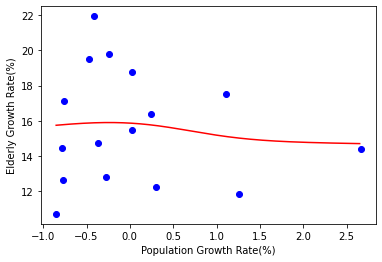

In [18]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),  
        tf.keras.layers.Dense(units=1)  
])

model.compile(optimizer = tf.optimizers.SGD(lr = 0.1,), loss='mse')   

#model.summary()

model.fit(X, Y, epochs=10)

model.predict(X)

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rate(%)")
plt.show()

## 11. 94 표준편차, 정규분포: 

- 각 데이터의 단위가 다른 것을 맞춰주기 위해서 정규화(Standardization)가 필요하다. 

- <표준화 vs 정규화>

1. 표준화(Standardization):
데이터가 평균을 기준으로 어느정도 떨어져있는지를 나타냄. 
Xnew = (X - 평균) / 표준편차

2. 정규화(Normalization):
데이터의 분포를 0~1로 조정.
Xnew = (X - 최솟값) / (최댓값 - 최솟값)

- 평균과 표준편차는 훈련데이터의 평균과 표준편차 사용. 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_34 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_35 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 1.8419 - val_loss: 0.5347
Epoch 2/25
303/303 [==============================] - 0s 79us/sample - loss: 0.4237 - val_loss: 0.2696

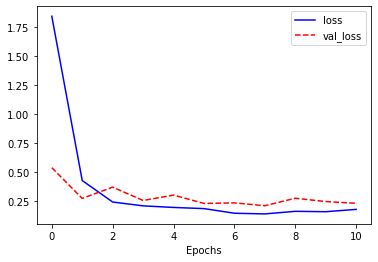

102/102 [==============================] - 0s 49us/sample - loss: 0.2505


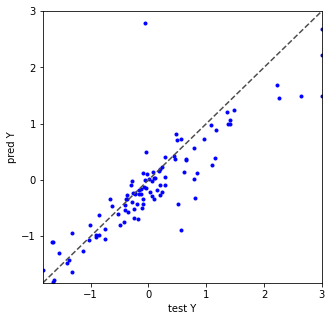

In [26]:
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

#
x_mean = train_X.mean(axis = 0)   # <<<<<<<<<<<<<<<<<<<<<<<<<<< 정규화식 확인!
x_std = train_X.std(axis = 0)

train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std
#

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units = 39, activation = 'relu'),
    tf.keras.layers.Dense(units = 26, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07), loss = 'mse')

model.summary()

history = model.fit(train_X, 
                    train_Y, 
                    epochs=25, 
                    batch_size=32, 
                    validation_split=0.25,       # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!
                    callbacks=[tf.keras.callbacks.EarlyStopping(             # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!
                        patience=3,          #몇번의 에포크를 기준으로 삼을 것인가?!
                        monitor='val_loss'   #어떤 값을 지켜볼 것인가!
                        )]                   # --> 3회의 에포크를 실행하는동안 최고기록을 갱신하지 못한다면 학습 멈춤
                   )

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()

model.evaluate(test_X, test_Y)    # <<<<<<<<<<<<<<<<<<<<<<<<<<<확인!

pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls = "--", c = ".3")
plt.xlabel('test Y')
plt.ylabel('pred Y')
plt.show()

# **CHAPTER 5. 분류**

## 12. 116~117 

- 지수함수의 특징: 
    - 

- softmax함수 사용하는 이유: , 그래프

# **CHAPTER 6**

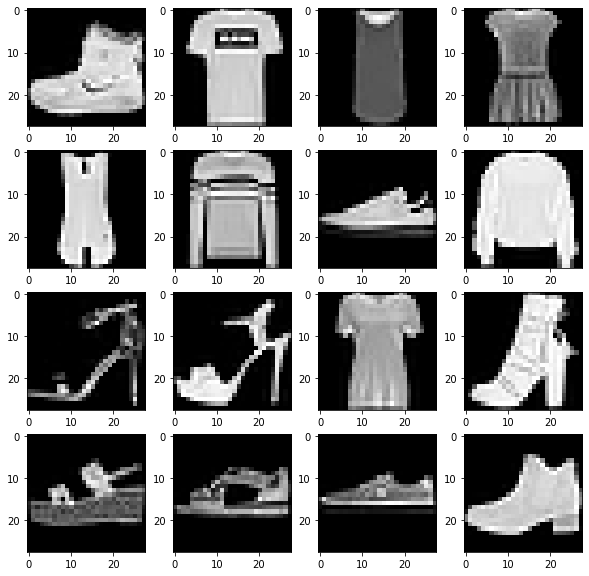

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CEABBF4588>>

In [31]:
# Convolution 모델 선언하기: 
# Fashion MNIST dataset 불러오기 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# 정규화하기
train_X = train_X / 255.0  # 흑백 진하기에 따라 255개로 나뉨
test_X = test_X / 255.0

# Dense layer에 훈련데이터와 테스트데이터를 통과시켰던 [분류]
# CNN 에서는 Dense Layer에 "Conv2D"레이어로 컨볼루션 연산을 해야 함. 
#   --> Conv2D레이어는 채널을 가진 형태의 데이터를 받도록 기본설정. 
#       cf. 컬러이미지는 보통 3채널(RGB), 흑백이미지는 1채널
# 이미지데이터가 채널을 갖도록 데이터의 shape 바꿔주기 
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# 전처리가 잘 됐는지 데이터 확인하기 
plt.figure(figsize=(10, 10))

for c in range(16):
    plt.subplot(4, 4, c+1)  # 4행 4열로 지정한 그리드에서 c+1번째 칸에 그래프 그리기 
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray') # 3차원 데이터를 2차원 데이터로 변환. 

plt.show()

print(train_Y[:16])

# 모델 생성하기 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),      # 다차원 데이터를 1차원으로 바꿔준 뒤 Dense 레이어로 보내기
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary